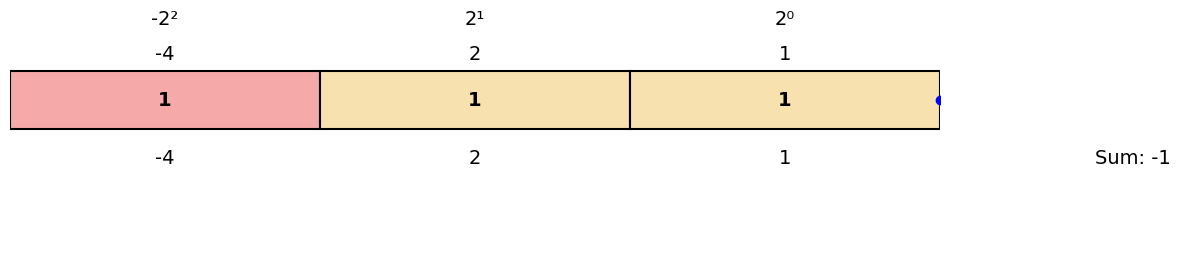

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

def plot_fixed_point(binary_str, plot_power_label=True, plot_decimal=True, plot_answer=True, twos_complement=False):
    if '.' in binary_str:
        binary_str_split = binary_str.split('.')
        int_bits = len(binary_str_split[0])
        frac_bits = len(binary_str_split[1])
    else:
        warnings.warn("No decimal point found in binary string. Assuming integer format.")
        int_bits = len(binary_str)
        frac_bits = 0
    
    bits = list(binary_str.replace('.', ''))
    total_bits = int_bits + frac_bits
    
    superscripts = {"0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴", "5": "⁵", "6": "⁶", "7": "⁷", "8": "⁸", "9": "⁹", "-": "⁻"}
    
    def to_superscript(num):
        return "".join(superscripts[d] for d in str(num))
    
    positions = np.arange(int_bits - 1, -frac_bits - 1, -1)
    labels = [f"2{to_superscript(p)}" for p in positions]
    decimal_values = [2**p if p >= 0 else 1/(2**abs(p)) for p in positions]
    
    if twos_complement:
        labels[0] = f"-2{to_superscript(int_bits - 1)}"
        decimal_values[0] = -decimal_values[0]
    
    selected_values = [decimal_values[i] if bits[i] == '1' else 0 for i in range(total_bits)]
    total_sum = sum(selected_values)
    
    # Convert decimal values for correct representation
    display_values = [f"{int(v)}" if v >= 1 else f"1/{int(1/v)}" for v in decimal_values]
    
    # Fix MSB (most significant bit) display in two’s complement mode
    if twos_complement:
        display_values[0] = str(int(decimal_values[0]))  # Ensure correct negative value instead of "1/0"

    selected_display_values = [display_values[i] if bits[i] == '1' else "" for i in range(total_bits)]
    
    int_part_color = '#F7E1AE'
    frac_part_color = '#C5DFF8'
    sign_bit_color = '#F5A9A9'
    
    colors = [sign_bit_color if (twos_complement and i == 0) else int_part_color if i < int_bits else frac_part_color for i in range(total_bits)]
    
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.set_xlim(-0.5, total_bits - 0.5)
    ax.set_ylim(-2.5, 1.5)
    ax.set_xticks(range(total_bits))
    ax.set_xticklabels(["" for _ in range(total_bits)])
    
    for i in range(total_bits):
        ax.add_patch(plt.Rectangle((i - 0.5, -0.5), 1, 1, facecolor=colors[i], edgecolor='black', linewidth=1.5))
        ax.text(i, 0, bits[i], ha='center', va='center', fontsize=14, fontweight='bold')
    
    if plot_power_label:
        for i, label in enumerate(labels):
            height = 1.4 if plot_decimal else 0.8
            ax.text(i, height, label, ha='center', va='center', fontsize=14)
    
    if plot_decimal:
        for i, dec_val in enumerate(display_values):
            ax.text(i, 0.8, dec_val, ha='center', va='center', fontsize=14)
    
    if plot_answer:
        for i, val in enumerate(selected_display_values):
            if val:
                ax.text(i, -1, val, ha='center', va='center', fontsize=14)
        ax.text(total_bits, -1, f"Sum: {total_sum}", ha='left', va='center', fontsize=14)
    
    decimal_position = int_bits
    ax.plot([decimal_position - 0.5], [0], 'bo', markersize=6)
    
    ax.axis('off')
    plt.show()

# Example Usage
binary_representation = "111."  # 3-bit two’s complement (expected output: -4)
plot_fixed_point(binary_representation, True, True, True, twos_complement=True)


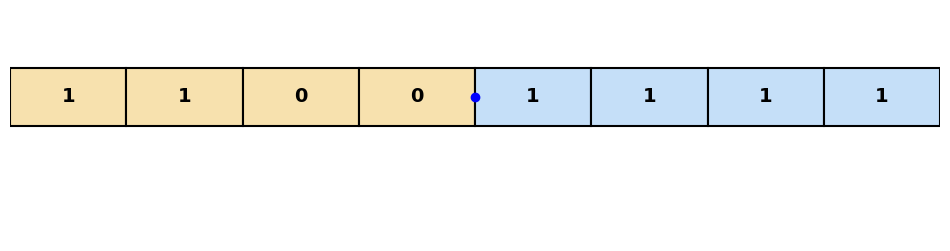

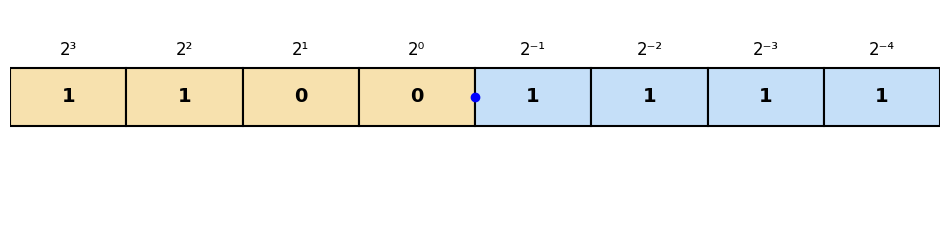

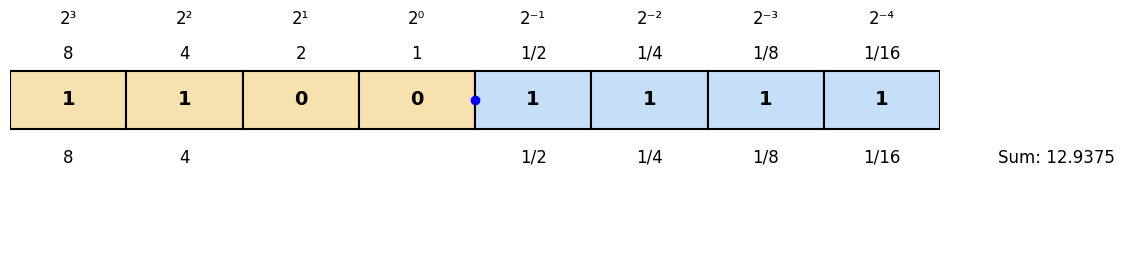

In [6]:
num = "1100.1111"

plot_fixed_point(num, False, False, False)
plot_fixed_point(num, True, False, False)
plot_fixed_point(num, True, True, True)


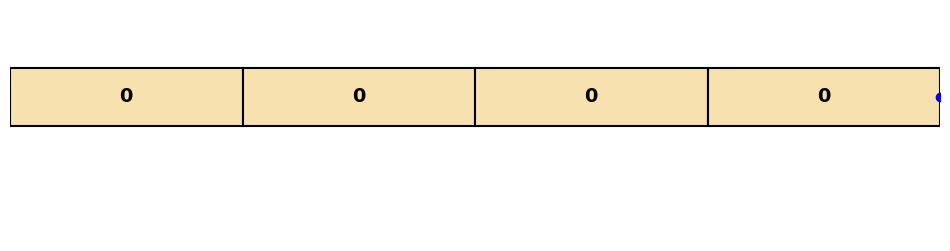

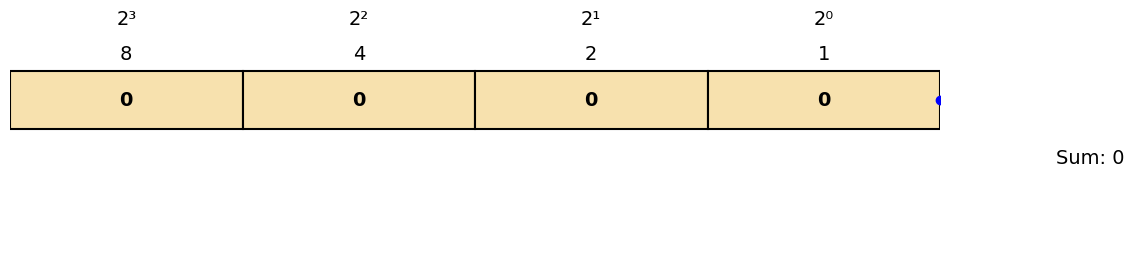

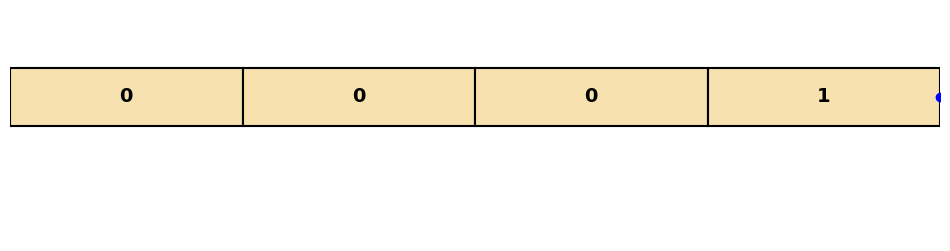

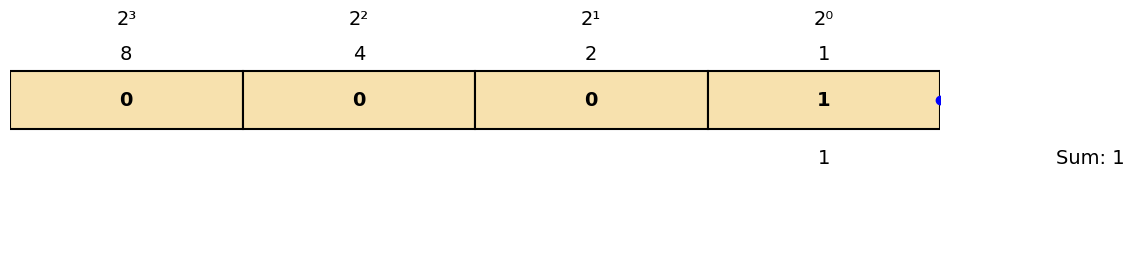

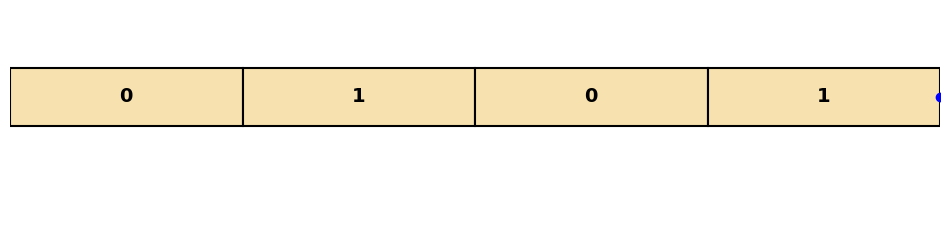

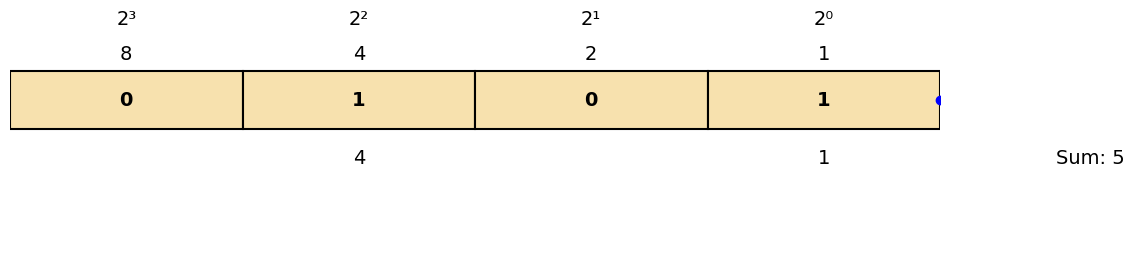

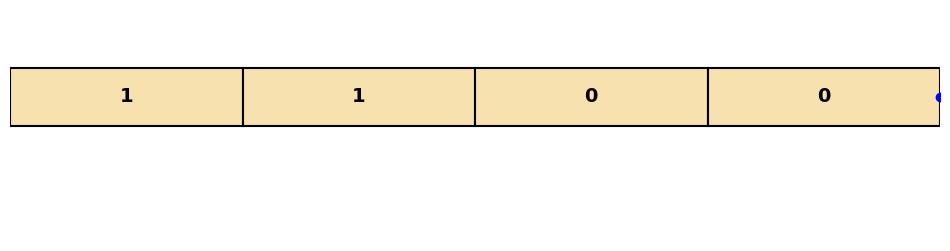

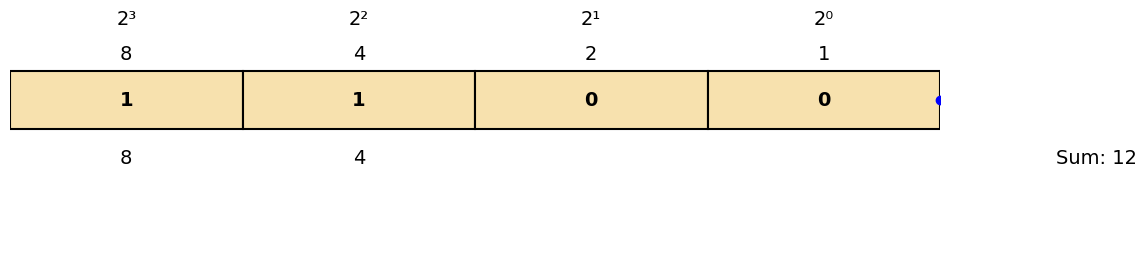

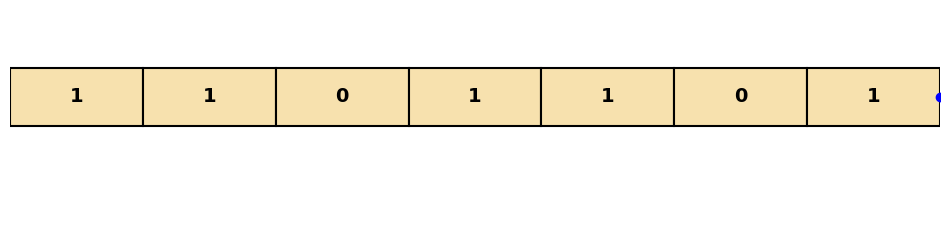

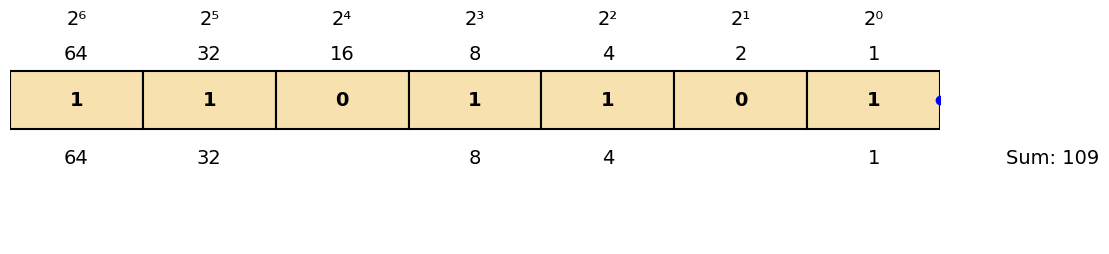

In [23]:
nums = ["0000.", "0001.", "0101.", "1100.", "1101101."]

for num in nums:
    plot_fixed_point(num, False, False, False)
    plot_fixed_point(num, True, True, True)
